In [1]:
# importa as libs que serao usadas
import pandas as pd
import pandas_profiling as pp
import numpy as np
import re
from kmodes.kprototypes import KPrototypes

In [2]:
insurance_df = pd.read_csv('customer.tsv', sep='\t')

In [3]:
insurance_df.head()

,CUSTOMER_ID,LAST,FIRST,STATE,REGION,SEX,PROFESSION,BUY_INSURANCE,AGE,HAS_CHILDREN,...,MONTHLY_CHECKS_WRITTEN,MORTGAGE_AMOUNT,N_TRANS_ATM,N_MORTGAGES,N_TRANS_TELLER,CREDIT_CARD_LIMITS,N_TRANS_KIOSK,N_TRANS_WEB_BANK,LTV,LTV_BIN
0,CU8589,KALA,IVERSON,WI,Midwest,F,PROF-9,No,49,1,...,4,5500,2,1,5,800,1,3700,25574,HIGH
1,CU9823,NESTOR,HORTON,CA,West,M,Nurse,No,24,0,...,0,0,0,0,0,1500,1,0,"21862,5",MEDIUM
2,CU12175,DWIGHT,ROLLINS,MI,Midwest,M,Programmer/Developer,No,26,1,...,4,1036,4,1,2,1000,4,1036,"19662,25",MEDIUM
3,CU7924,GRADY,STATON,NY,NorthEast,M,Programmer/Developer,No,32,0,...,17,0,3,0,2,700,3,0,"16816,5",MEDIUM
4,CU14284,DOMINICK,LAW,NY,NorthEast,M,Construction Laborer,No,24,0,...,1,358,0,1,0,1500,1,358,"27042,5",HIGH


In [4]:
insurance_df.columns

Index(['CUSTOMER_ID', 'LAST', 'FIRST', 'STATE', 'REGION', 'SEX', 'PROFESSION',
       'BUY_INSURANCE', 'AGE', 'HAS_CHILDREN', 'SALARY', 'N_OF_DEPENDENTS',
       'CAR_OWNERSHIP', 'HOUSE_OWNERSHIP', 'TIME_AS_CUSTOMER',
       'MARITAL_STATUS', 'CREDIT_BALANCE', 'BANK_FUNDS', 'CHECKING_AMOUNT',
       'MONEY_MONTLY_OVERDRAWN', 'T_AMOUNT_AUTOM_PAYMENTS',
       'MONTHLY_CHECKS_WRITTEN', 'MORTGAGE_AMOUNT', 'N_TRANS_ATM',
       'N_MORTGAGES', 'N_TRANS_TELLER', 'CREDIT_CARD_LIMITS', 'N_TRANS_KIOSK',
       'N_TRANS_WEB_BANK', 'LTV', 'LTV_BIN'],
      dtype='object')

In [5]:
insurance_df.describe()

,AGE,HAS_CHILDREN,SALARY,N_OF_DEPENDENTS,CAR_OWNERSHIP,HOUSE_OWNERSHIP,TIME_AS_CUSTOMER,CREDIT_BALANCE,BANK_FUNDS,CHECKING_AMOUNT,T_AMOUNT_AUTOM_PAYMENTS,MONTHLY_CHECKS_WRITTEN,MORTGAGE_AMOUNT,N_TRANS_ATM,N_MORTGAGES,N_TRANS_TELLER,CREDIT_CARD_LIMITS,N_TRANS_KIOSK,N_TRANS_WEB_BANK
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,38.190148,0.511330,65102.802956,1.993103,0.946798,0.804926,2.428571,2234.101478,2639.839409,1055.848276,4980.337931,4.311330,2066.122167,2.826601,0.804926,1.731034,1285.615764,1.864039,1449.675862
std,14.918394,0.500118,6848.442846,1.549624,0.224547,0.507707,1.233399,11727.873804,4996.100695,3124.405985,20443.657812,4.817336,3184.931347,1.891401,0.507707,1.499366,858.206693,1.826076,2428.920827
min,0.000000,0.000000,37572.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000
25%,27.000000,0.000000,60804.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,25.000000,191.500000,1.000000,176.000000,1.000000,1.000000,1.000000,800.000000,1.000000,250.000000
50%,36.000000,1.000000,64173.000000,1.000000,1.000000,1.000000,2.000000,0.000000,500.000000,25.000000,623.000000,3.000000,1100.000000,3.000000,1.000000,1.000000,1000.000000,1.000000,800.000000
75%,48.000000,1.000000,68391.500000,3.000000,1.000000,1.000000,3.000000,0.000000,2900.000000,228.500000,2322.500000,5.000000,3000.000000,4.000000,1.000000,3.000000,1500.000000,3.000000,1990.000000
max,84.000000,1.000000,109943.000000,6.000000,1.000000,2.000000,5.000000,170498.000000,36000.000000,23476.000000,499362.000000,18.000000,45000.000000,8.000000,2.000000,9.000000,5000.000000,10.000000,45000.000000


In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 31 columns):
CUSTOMER_ID                1015 non-null object
LAST                       1015 non-null object
FIRST                      1015 non-null object
STATE                      1015 non-null object
REGION                     1015 non-null object
SEX                        1015 non-null object
PROFESSION                 1015 non-null object
BUY_INSURANCE              1015 non-null object
AGE                        1015 non-null int64
HAS_CHILDREN               1015 non-null int64
SALARY                     1015 non-null int64
N_OF_DEPENDENTS            1015 non-null int64
CAR_OWNERSHIP              1015 non-null int64
HOUSE_OWNERSHIP            1015 non-null int64
TIME_AS_CUSTOMER           1015 non-null int64
MARITAL_STATUS             1015 non-null object
CREDIT_BALANCE             1015 non-null int64
BANK_FUNDS                 1015 non-null int64
CHECKING_AMOUNT            1015 non-nu

In [7]:
insurance_df['MONEY_MONTLY_OVERDRAWN'].head()

0    53,14
1    53,06
2    53,42
3    53,18
4    53,06
Name: MONEY_MONTLY_OVERDRAWN, dtype: object

In [8]:
insurance_df = insurance_df.drop(['CUSTOMER_ID', 'LAST', 'FIRST', 'STATE', 'BUY_INSURANCE', 'HAS_CHILDREN'], axis=1)

In [9]:
def ReplaceCommaForDot(string):
    return string.replace(',','.')

for column in ['LTV', 'MONEY_MONTLY_OVERDRAWN']:
    insurance_df[column] = insurance_df[column].apply(ReplaceCommaForDot)
    insurance_df[column] = insurance_df[column].astype(float)

In [10]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 25 columns):
REGION                     1015 non-null object
SEX                        1015 non-null object
PROFESSION                 1015 non-null object
AGE                        1015 non-null int64
SALARY                     1015 non-null int64
N_OF_DEPENDENTS            1015 non-null int64
CAR_OWNERSHIP              1015 non-null int64
HOUSE_OWNERSHIP            1015 non-null int64
TIME_AS_CUSTOMER           1015 non-null int64
MARITAL_STATUS             1015 non-null object
CREDIT_BALANCE             1015 non-null int64
BANK_FUNDS                 1015 non-null int64
CHECKING_AMOUNT            1015 non-null int64
MONEY_MONTLY_OVERDRAWN     1015 non-null float64
T_AMOUNT_AUTOM_PAYMENTS    1015 non-null int64
MONTHLY_CHECKS_WRITTEN     1015 non-null int64
MORTGAGE_AMOUNT            1015 non-null int64
N_TRANS_ATM                1015 non-null int64
N_MORTGAGES                1015 non-null 

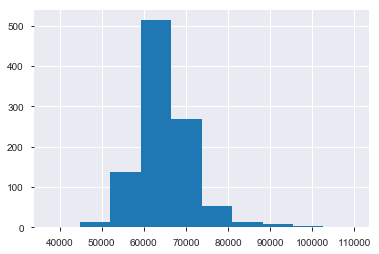

In [11]:
insurance_df['SALARY'].hist()

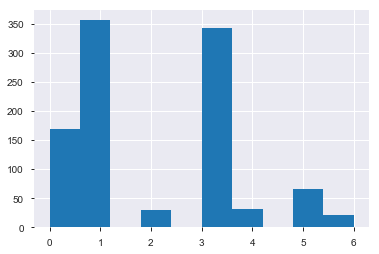

In [12]:
insurance_df['N_OF_DEPENDENTS'].hist()

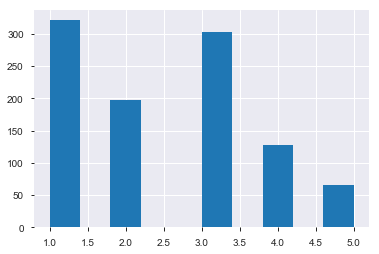

In [13]:
insurance_df['TIME_AS_CUSTOMER'].hist()

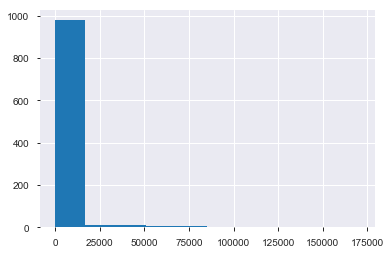

In [14]:
insurance_df['CREDIT_BALANCE'].hist()

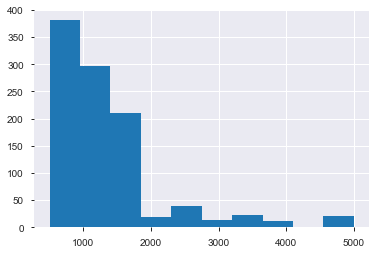

In [15]:
insurance_df['CREDIT_CARD_LIMITS'].hist()

In [16]:
insurance_df['MONTHLY_CHECKS_WRITTEN'].value_counts()

0     210
2     155
4     133
3     129
1     119
12     25
9      25
6      24
5      22
13     21
11     20
14     20
15     18
18     18
7      17
16     16
17     15
10     14
8      14
Name: MONTHLY_CHECKS_WRITTEN, dtype: int64

In [17]:
insurance_df = insurance_df[insurance_df['AGE'] != 0].reset_index(drop=True)
for index, prof in insurance_df['PROFESSION'].iteritems():
    if prof[:5] == 'PROF-':
        insurance_df.loc[index, 'PROFESSION'] = 'Not specified'
#insurance_df['PROFESSION'] = insurance_df['PROFESSION'].replace(to_replace='PROF-*', value='Not specified', regex=True)
for column in ['AGE', 'SEX', 'REGION', 'PROFESSION', 'MARITAL_STATUS', 'N_OF_DEPENDENTS', 'CAR_OWNERSHIP', 'HOUSE_OWNERSHIP', 'TIME_AS_CUSTOMER', 'N_MORTGAGES', 'MONTHLY_CHECKS_WRITTEN']:
    insurance_df[column] = pd.Categorical(insurance_df[column])

In [18]:
insurance_df['PROFESSION'].value_counts()

Not specified               246
Programmer/Developer        137
IT Staff                     87
Nurse                        53
Clerical                     35
Cashier                      32
Waiter/Waitress              31
Veterinarian                 27
Administrative Assistant     26
Author                       26
Sales Representative         23
Truck Driver                 23
Construction Laborer         19
Publisher                    18
First-line Manager           17
Lab Technician               16
Fireman                      15
Homemaker                    14
Software Engineer            13
Dentist                      13
DBA                          13
Bank Teller                  12
Technical Writer             12
Professor                    12
School Teacher               11
Administrator                10
Childcare Worker             10
Law Enforcement Officer       9
Medical Doctor                9
Plumber                       7
Secretary                     7
Mason   

In [19]:
insurance_df['LTV_BIN'].value_counts()

HIGH         483
MEDIUM       334
VERY HIGH    109
LOW           68
Name: LTV_BIN, dtype: int64

In [20]:
insurance_df.drop(['LTV_BIN', 'CREDIT_BALANCE', 'T_AMOUNT_AUTOM_PAYMENTS', 'MORTGAGE_AMOUNT', 'BANK_FUNDS', 'CHECKING_AMOUNT', 'N_TRANS_WEB_BANK'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
REGION                    994 non-null category
SEX                       994 non-null category
PROFESSION                994 non-null category
AGE                       994 non-null category
SALARY                    994 non-null int64
N_OF_DEPENDENTS           994 non-null category
CAR_OWNERSHIP             994 non-null category
HOUSE_OWNERSHIP           994 non-null category
TIME_AS_CUSTOMER          994 non-null category
MARITAL_STATUS            994 non-null category
MONEY_MONTLY_OVERDRAWN    994 non-null float64
MONTHLY_CHECKS_WRITTEN    994 non-null category
N_TRANS_ATM               994 non-null int64
N_MORTGAGES               994 non-null category
N_TRANS_TELLER            994 non-null int64
CREDIT_CARD_LIMITS        994 non-null int64
N_TRANS_KIOSK             994 non-null int64
LTV                       994 non-null float64
dtypes: category(11), float64(2), int64(5)
memor

In [21]:
# Clusterização
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=0)
clusters = kproto.fit_predict(insurance_df.drop(['LTV_BIN', 'PROFESSION', 'CREDIT_BALANCE', 'T_AMOUNT_AUTOM_PAYMENTS', 'MORTGAGE_AMOUNT', 'BANK_FUNDS', 'CHECKING_AMOUNT', 'N_TRANS_WEB_BANK'], axis=1), categorical=[0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 13])

In [22]:
# Criação da Feature de Resposta da Clusterização
classification = kproto.labels_
insurance_df['Cluster_Classification'] = classification

In [23]:
insurance_df['Cluster_Classification'].value_counts()

0    393
2    276
3    168
1    157
Name: Cluster_Classification, dtype: int64

In [24]:
insurance_df.head(20)

,REGION,SEX,PROFESSION,AGE,SALARY,N_OF_DEPENDENTS,CAR_OWNERSHIP,HOUSE_OWNERSHIP,TIME_AS_CUSTOMER,MARITAL_STATUS,...,MORTGAGE_AMOUNT,N_TRANS_ATM,N_MORTGAGES,N_TRANS_TELLER,CREDIT_CARD_LIMITS,N_TRANS_KIOSK,N_TRANS_WEB_BANK,LTV,LTV_BIN,Cluster_Classification
0,Midwest,F,Not specified,49,68696,1,1,1,1,WIDOWED,...,5500,2,1,5,800,1,3700,25574.00,HIGH,0
1,West,M,Nurse,24,73850,0,1,0,2,SINGLE,...,0,0,0,0,1500,1,0,21862.50,MEDIUM,2
2,Midwest,M,Programmer/Developer,26,60249,2,1,1,2,MARRIED,...,1036,4,1,2,1000,4,1036,19662.25,MEDIUM,2
3,NorthEast,M,Programmer/Developer,32,60466,1,1,0,1,SINGLE,...,0,3,0,2,700,3,0,16816.50,MEDIUM,1
4,NorthEast,M,Construction Laborer,24,76570,3,1,1,3,SINGLE,...,358,0,1,0,1500,1,358,27042.50,HIGH,0
5,Southwest,M,Truck Driver,35,62756,1,1,1,1,MARRIED,...,1500,3,1,2,500,1,1500,22689.00,HIGH,0
6,NorthEast,F,IT Staff,36,62886,1,1,1,1,MARRIED,...,1020,3,1,2,1000,1,1020,22821.50,HIGH,0
7,Midwest,F,Truck Driver,26,61012,1,1,1,1,MARRIED,...,1300,3,1,1,1100,0,1300,21353.00,MEDIUM,2
8,West,M,Author,78,65134,0,1,0,2,SINGLE,...,0,1,0,0,900,0,0,20083.50,MEDIUM,2
9,West,F,Not specified,49,60322,3,1,1,4,WIDOWED,...,6500,4,1,4,900,2,1700,20980.50,MEDIUM,2


In [47]:
x = insurance_df[insurance_df['LTV_BIN'] == 'VERY HIGH']
x = x[x['Cluster_Classification'] == 3]
x.shape

(109, 26)